In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
def logNormal(S, r, q, sig, S0, T):    
    f = np.exp(-0.5*((np.log(S/S0)-(r-q-sig**2/2)*T)/(sig*np.sqrt(T)))**2)/(sig*S*np.sqrt(2*np.pi*T))
    return f

In [9]:
# Fixed Parameters
S0 = 100
K = 120
r = 0.05
q = 0.01
sig = 0.5
T = 1.0

#step-size
dS = 0.25
# right limit
r_lim = 375

In [55]:
t0 = time.time()
# S values
S = np.arange(dS, r_lim, dS)
# lognormal density f(S|S0)
f = logNormal(S, r, q, sig, S0, T)
# call payoff
c_payoff = np.maximum(S - K, 0)
# put payoff
p_payoff = np.maximum(K - S, 0)
total_time = time.time() - t0
print('elapsed time = %f' % (total_time))

elapsed time = 0.000605


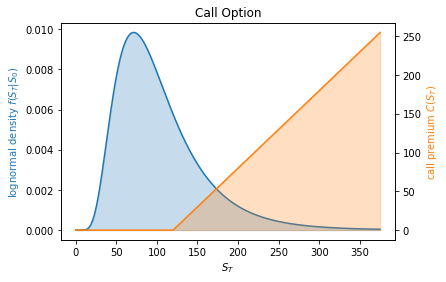

In [62]:
fig, ax1 = plt.subplots()
ax1.plot(S, f, color='C0')
ax1.set_xlabel('$S_T$')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('lognormal density $f(S_T|S_0)$', color='C0')
#ax1.tick_params('y', colors='b')
ax1.fill_between(S, 0, f, color='C0', alpha=0.25)

ax2 = ax1.twinx()
ax2.plot(S, c_payoff, color='C1')
ax2.set_ylabel('call premium $C(S_T)$', color='C1')
#ax2.tick_params('y', colors='r')
ax2.fill_between(S, 0, c_payoff, color='C1', alpha=0.25)

plt.title('Call Option')
#fig.tight_layout()
plt.show()

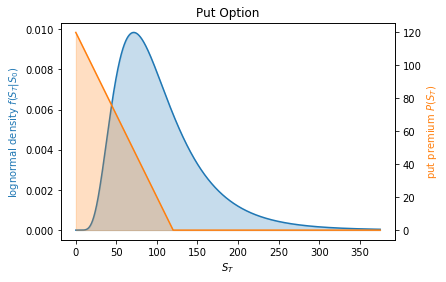

In [64]:
fig, ax1 = plt.subplots()
ax1.plot(S, f, color='C0')
ax1.set_xlabel('$S_T$')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('lognormal density $f(S_T|S_0)$', color='C0')
#ax1.tick_params('y', colors='b')
ax1.fill_between(S, 0, f, color='C0', alpha=0.25)

ax2 = ax1.twinx()
ax2.plot(S, p_payoff, color='C1')
ax2.set_ylabel('put premium $P(S_T)$', color='C1')
ax2.fill_between(S, 0, p_payoff, color='C1', alpha=0.25)
#ax2.tick_params('y', colors='r')

plt.title('Put Option')
#fig.tight_layout()
plt.show()